## Predicting Time of Delivery on E-commerce dataset

### Importing Necessary Libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#### Importing the dataset

In [134]:
data = pd.read_excel("../data_!/new2.1.xlsx")

In [135]:
data.head()

,ID,Latitude,Longitude,Gender,Age,Type_of_Product,Weight_Category,No. of Products,Date_of_Delivery,Time_of_Delivery
0,A101,48.115334,-1.676348,Male,18,Grooming,A,3,2020-01-01,1405
1,A102,48.088967,-1.660292,Male,19,Electronics,A,2,2020-01-02,1405
2,A103,47.216827,-1.557359,Male,20,Home & Kitchen,A,4,2020-01-03,1405
3,A104,48.122202,-1.632854,Male,21,Sports,A,2,2020-01-04,1405
4,A105,48.132581,-1.658611,Male,22,Books,A,3,2020-01-05,1405


In [136]:
# Shape of the datset
print("The shape of the dataset (rows,colums) is",data.shape)

The shape of the dataset (rows,colums) is (20001, 10)


In [137]:
data.dtypes

ID                          object
Latitude                   float64
Longitude                  float64
Gender                      object
Age                          int64
Type_of_Product             object
Weight_Category             object
No. of Products              int64
Date_of_Delivery    datetime64[ns]
Time_of_Delivery             int64
dtype: object

#### Converting into categorical types

In [138]:
col_data = ['Gender','Type_of_Product','Weight_Category']

In [139]:
for i in col_data:
    data[i] = data[i].astype('category')

In [140]:
data.dtypes

ID                          object
Latitude                   float64
Longitude                  float64
Gender                    category
Age                          int64
Type_of_Product           category
Weight_Category           category
No. of Products              int64
Date_of_Delivery    datetime64[ns]
Time_of_Delivery             int64
dtype: object

In [141]:
print("The number of unique Customer are",len(data['ID'].unique()))

The number of unique Customer are 50


#### Deriving new features using the date_of_delivery column

In [142]:
data["Year"] = data["Date_of_Delivery"].dt.year

In [143]:
data['Month'] = data["Date_of_Delivery"].dt.month

In [144]:
data['Day'] = data["Date_of_Delivery"].dt.day

In [145]:
data.head()

,ID,Latitude,Longitude,Gender,Age,Type_of_Product,Weight_Category,No. of Products,Date_of_Delivery,Time_of_Delivery,Year,Month,Day
0,A101,48.115334,-1.676348,Male,18,Grooming,A,3,2020-01-01,1405,2020,1,1
1,A102,48.088967,-1.660292,Male,19,Electronics,A,2,2020-01-02,1405,2020,1,2
2,A103,47.216827,-1.557359,Male,20,Home & Kitchen,A,4,2020-01-03,1405,2020,1,3
3,A104,48.122202,-1.632854,Male,21,Sports,A,2,2020-01-04,1405,2020,1,4
4,A105,48.132581,-1.658611,Male,22,Books,A,3,2020-01-05,1405,2020,1,5


#### Gender Ratio

In [146]:
m = data[data['Gender'] == 'Male'].shape[0]

In [147]:
f = data[data['Gender'] == 'Female'].shape[0]

In [148]:
print("Number of customers based on gender:" + "\n",data['Gender'].value_counts())

Number of customers based on gender:
 Female    11001
Male       9000
Name: Gender, dtype: int64


Text(0, 0.5, 'Count')

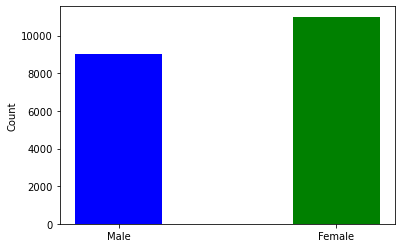

In [149]:
plt.bar(['Male','Female'],(m,f),width = 0.4,color= ['blue','green'])
plt.ylabel("Count")

#### Product counts

In [150]:
type_counts = np.array([5560,2881,2120,2120,2040,2040,1800,1440])
mylabels = ["Electronics","Toys","Furniture","Books","Sports","Grooming","Home & Kitchen","Fashion"]


In [151]:
data['Type_of_Product'].value_counts()

Electronics       5560
Toys              2881
Furniture         2120
Books             2120
Sports            2040
Grooming          2040
Home & Kitchen    1800
Fashion           1440
Name: Type_of_Product, dtype: int64

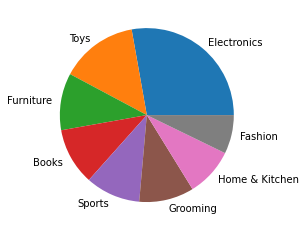

In [152]:
plt.pie(type_counts, labels = mylabels)
plt.show() 

#### Product categories

In [153]:
a = data[data['Weight_Category'] == 'A'].shape[0]

In [154]:
b = data[data['Weight_Category'] == 'B'].shape[0]

In [155]:
c = data[data['Weight_Category'] == 'C'].shape[0]

In [156]:
d = data[data['Weight_Category'] == 'D'].shape[0]

Text(0, 0.5, 'Count')

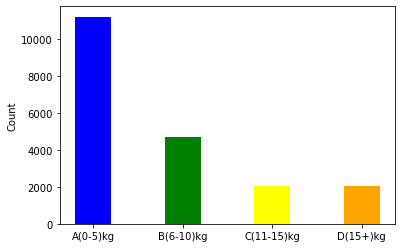

In [157]:
plt.bar(['A','B','C','D'],(a,b,c,d),width = 0.4,color= ['blue','green','yellow','orange'],
       tick_label = ['A(0-5)kg','B(6-10)kg','C(11-15)kg','D(15+)kg'])
plt.ylabel("Count")

#### Dropping unnecessary columns

In [158]:
data = data.drop(['ID','Date_of_Delivery'],axis = 1)

In [159]:
data1 = pd.get_dummies(data,drop_first = True)

In [160]:
data1.columns

Index(['Latitude', 'Longitude', 'Age', 'No. of Products', 'Time_of_Delivery',
       'Year', 'Month', 'Day', 'Gender_Male', 'Type_of_Product_Electronics',
       'Type_of_Product_Fashion', 'Type_of_Product_Furniture',
       'Type_of_Product_Grooming', 'Type_of_Product_Home & Kitchen',
       'Type_of_Product_Sports', 'Type_of_Product_Toys', 'Weight_Category_B',
       'Weight_Category_C', 'Weight_Category_D'],
      dtype='object')

#### Checking for correlation among numerical variables

In [161]:
num_attr = data1.select_dtypes(include=['int64', 'float64']).columns
num_attr

Index(['Latitude', 'Longitude', 'Age', 'No. of Products', 'Time_of_Delivery',
       'Year', 'Month', 'Day'],
      dtype='object')

In [162]:
data1[num_attr].corr()

,Latitude,Longitude,Age,No. of Products,Time_of_Delivery,Year,Month,Day
Latitude,1.000000,-0.468428,0.066822,-0.006619,0.000530,0.007215,0.004085,0.004509
Longitude,-0.468428,1.000000,-0.010018,0.000913,-0.000067,0.006698,-0.000200,-0.008413
Age,0.066822,-0.010018,1.000000,-0.004265,-0.005644,0.038170,-0.033488,-0.018558
No. of Products,-0.006619,0.000913,-0.004265,1.000000,0.000123,0.008292,-0.007077,0.001309
Time_of_Delivery,0.000530,-0.000067,-0.005644,0.000123,1.000000,-0.009052,0.001785,-0.002810
Year,0.007215,0.006698,0.038170,0.008292,-0.009052,1.000000,-0.481808,-0.054811
Month,0.004085,-0.000200,-0.033488,-0.007077,0.001785,-0.481808,1.000000,0.012692
Day,0.004509,-0.008413,-0.018558,0.001309,-0.002810,-0.054811,0.012692,1.000000


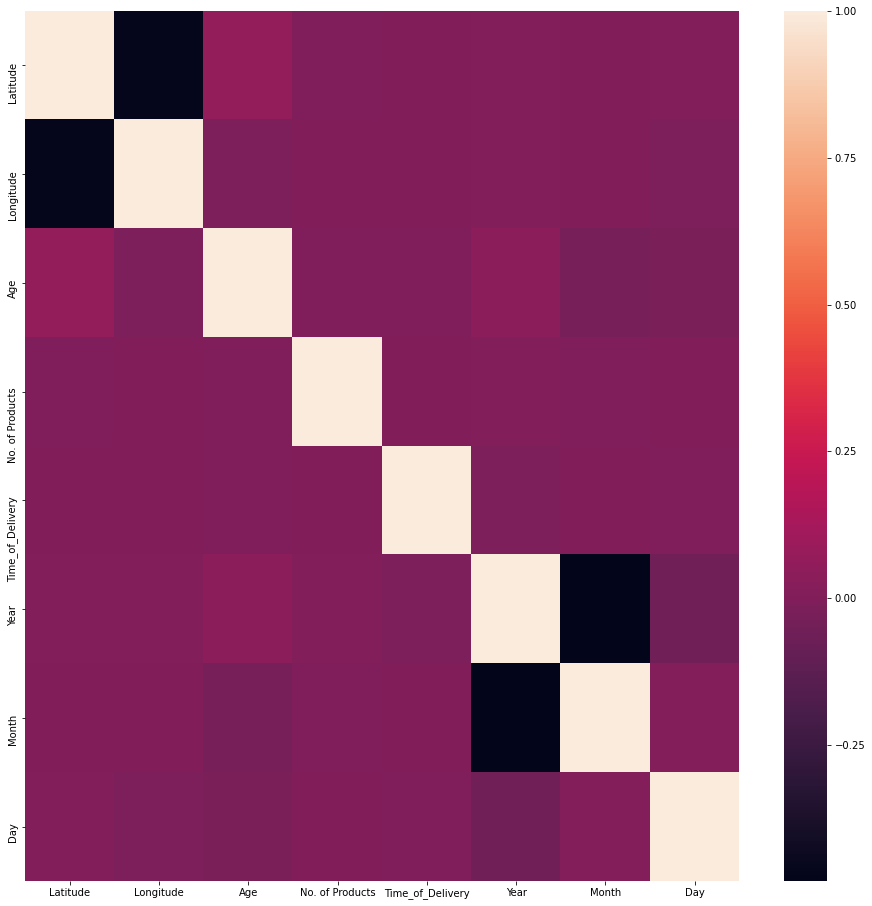

Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.


In [163]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr())
plt.show()

print("Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.")

#### Splitting the dataset into train and test

In [164]:
X = data1.copy()

In [165]:
X.columns

Index(['Latitude', 'Longitude', 'Age', 'No. of Products', 'Time_of_Delivery',
       'Year', 'Month', 'Day', 'Gender_Male', 'Type_of_Product_Electronics',
       'Type_of_Product_Fashion', 'Type_of_Product_Furniture',
       'Type_of_Product_Grooming', 'Type_of_Product_Home & Kitchen',
       'Type_of_Product_Sports', 'Type_of_Product_Toys', 'Weight_Category_B',
       'Weight_Category_C', 'Weight_Category_D'],
      dtype='object')

In [166]:
X = X.drop(['Time_of_Delivery'],axis = 1)

In [167]:
y = data1['Time_of_Delivery']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

#### Standardizing the dataset

In [169]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [170]:
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

## Feeding the datset to various algorithms

#### Linear Regression

In [171]:
linreg = LinearRegression() 

In [172]:
linreg.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
print ("The coefficients are", linreg.coef_)
print ("The intercept is: ", linreg.intercept_)

The coefficients are [-1.26764525 -0.77613518 -1.38762448  2.5904474  -3.70340326 -1.89264881
  0.07502271 -0.32637443 -1.14534366  1.28740695  1.21560359  0.40419369
 -0.25153517  2.13523205  1.13589385 -0.00874422 -2.05057619 -1.77261967]
The intercept is:  1210.4196875000002


In [178]:
train_pred_linear = linreg.predict(X_train_std)
test_pred_linear = linreg.predict(X_test_std)

In [179]:
from sklearn.metrics import mean_absolute_error
import math

In [218]:
mae_linear = mean_absolute_error(y_test,test_pred_linear)

In [219]:
mse_linear = mean_squared_error(y_test,test_pred_linear)

In [220]:
rmse_linear = math.sqrt(mean_squared_error(y_test,test_pred_linear))

In [221]:
r2_linear = r2_score(y_pred=test_pred_linear, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_linear = 1 - ((1 - r2_linear) * (n - 1)) / (n - p - 1)

In [222]:
print("For Linear Regression:")
print("Mean Absolute Error is",mae_linear)
print("Mean Squared Error is",mse_linear)
print("Root Mean Squared Error is",math.sqrt(mse_linear))
print("Adjusted R2 value is",adj_r_linear)

For Linear Regression:
Mean Absolute Error is 116.80824139068137
Mean Squared Error is 34462.95546836403
Root Mean Squared Error is 185.64200889982857
Adjusted R2 value is 0.2382984397583865


#### Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
regr_1 = DecisionTreeRegressor(max_depth = 15)

In [41]:
regr_1.fit(X_train_std, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
train_pred_DT = regr_1.predict(X_train_std)
test_pred_DT = regr_1.predict(X_test_std)

In [223]:
mae_DT = mean_absolute_error(y_test,test_pred_DT)

In [224]:
mse_DT = mean_squared_error(y_test,test_pred_DT)

In [225]:
rmse_DT = math.sqrt(mean_squared_error(y_test,test_pred_DT))

In [226]:
r2_DT = r2_score(y_pred=test_pred_DT, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_DT = 1 - ((1 - r2_DT) * (n - 1)) / (n - p - 1)

In [228]:
print("For Decision Tree Regressor:")
print("Mean Absolute Error is",mae_DT)
print("Mean Squared Error is",mse_DT)
print("Root Mean Squared Error is",math.sqrt(mse_DT))
print("Adjusted R2 value is",adj_r_DT)

For Decision Tree Regressor:
Mean Absolute Error is 105.65473316746939
Mean Squared Error is 40658.679751601965
Root Mean Squared Error is 201.63997557925353
Adjusted R2 value is 0.5674517051333556


#### LASSO

In [45]:
from sklearn import linear_model

In [46]:
lasso_reg = linear_model.Lasso(alpha = 1, max_iter = 10)
lasso_reg.fit(X_train_std,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=10, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [48]:
train_pred_lasso = lasso_reg.predict(X_train_std)
test_pred_lasso = lasso_reg.predict(X_test_std)

In [229]:
mae_lasso = mean_absolute_error(y_test,test_pred_lasso)

In [230]:
mse_lasso = mean_squared_error(y_test,test_pred_lasso)

In [231]:
rmse_lasso = math.sqrt(mean_squared_error(y_test,test_pred_lasso))

In [232]:
r2_lasso = r2_score(y_pred=test_pred_lasso, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_lasso = 1 - ((1 - r2_lasso) * (n - 1)) / (n - p - 1)

In [234]:
print("For LASSO:")
print("Mean Absolute Error is",mae_lasso)
print("Mean Squared Error is",mse_lasso)
print("Root Mean Squared Error is",math.sqrt(mse_lasso))
print("Adjusted R2 value is",adj_r_lasso)

For LASSO:
Mean Absolute Error is 116.7337191202131
Mean Squared Error is 34401.463513879826
Root Mean Squared Error is 185.4763152369591
Adjusted R2 value is 0.1843445044075942


#### Ridge

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge = Ridge(alpha=1.0)

In [52]:
ridge.fit(X_train_std,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [192]:
train_pred_ridge = ridge.predict(X_train_std)
test_pred_ridge = ridge.predict(X_test_std)

In [235]:
mae_ridge = mean_absolute_error(y_test,test_pred_ridge)

In [236]:
mse_ridge = mean_squared_error(y_test,test_pred_ridge)

In [237]:
rmse_ridge = math.sqrt(mean_squared_error(y_test,test_pred_ridge))

In [238]:
r2_ridge = r2_score(y_pred=test_pred_ridge, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_ridge = 1 - ((1 - r2_ridge) * (n - 1)) / (n - p - 1)

In [239]:
print("For Ridge:")
print("Mean Absolute Error is",mae_ridge)
print("Mean Squared Error is",mse_ridge)
print("Root Mean Squared Error is",math.sqrt(mse_ridge))
print("Adjusted R2 value is",adj_r_ridge)

For Ridge:
Mean Absolute Error is 116.80823255426853
Mean Squared Error is 34462.94527111754
Root Mean Squared Error is 185.64198143501253
Adjusted R2 value is 0.23828949254598886


#### Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor(max_depth = 20)

In [58]:
rf.fit(X_train_std,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [198]:
train_pred_rf = rf.predict(X_train_std)
test_pred_rf = rf.predict(X_test_std)

In [240]:
mae_rf = mean_absolute_error(y_test,test_pred_rf)

In [241]:
mse_rf = mean_squared_error(y_test,test_pred_rf)

In [242]:
rmse_rf = math.sqrt(mean_squared_error(y_test,test_pred_rf))

In [243]:
r2_rf = r2_score(y_pred=test_pred_rf, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_rf = 1 - ((1 - r2_rf) * (n - 1)) / (n - p - 1)

In [245]:
print("For Random Forest Regressor:")
print("Mean Absolute Error is",mae_rf)
print("Mean Squared Error is",mse_rf)
print("Root Mean Squared Error is",math.sqrt(mse_rf))
print("Adjusted R2 value is",adj_r_rf)

For Random Forest Regressor:
Mean Absolute Error is 98.67155863547558
Mean Squared Error is 17950.685025466206
Root Mean Squared Error is 133.9801665376865
Adjusted R2 value is 0.6499103257410193


#### XGB

In [63]:
from xgboost import XGBRegressor

In [67]:
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [68]:
xgb.fit(X_train_std,y_train)

[15:39:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [203]:
train_pred_xgb = xgb.predict(X_train_std)
test_pred_xgb = xgb.predict(X_test_std)

In [247]:
mae_xgb = mean_absolute_error(y_test,test_pred_xgb)

In [248]:
mse_xgb = mean_squared_error(y_test,test_pred_xgb)

In [249]:
rmse_xgb = math.sqrt(mean_squared_error(y_test,test_pred_xgb))

In [250]:
r2_xgb = r2_score(y_pred=test_pred_xgb, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_xgb = 1 - ((1 - r2_xgb) * (n - 1)) / (n - p - 1)

In [252]:
print("For XGB Regressor:")
print("Mean Absolute Error is",mae_xgb)
print("Mean Squared Error is",mse_xgb)
print("Root Mean Squared Error is",math.sqrt(mse_xgb))
print("Adjusted R2 value is",adj_r_xgb)

For XGB Regressor:
Mean Absolute Error is 103.00577054527872
Mean Squared Error is 35952.505645108286
Root Mean Squared Error is 189.6114596882485
Adjusted R2 value is 0.3090502864842639
